In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpStatus
from shapely.geometry import Point
from sklearn.cluster import KMeans

In [3]:
df_nuevos = gpd.read_file('colegios_nuevos.geojson')
df_reales = gpd.read_file('colegios_reales.geojson')

In [4]:
df_nuevos

,CODIGO_DANE,COLE_INST_NOMBRE,SECTOR,COLE_CATEGORIA,TOTAL_MATRICULA,geometry
0,305001025746,A.B.C. CENT EDUC,NO_OFICIAL,3,55,POINT (-75.55485 6.30779)
1,305001026181,C.E. AMIGUITOS CREATIVOS,NO_OFICIAL,2,55,POINT (-75.58447 6.22594)
2,305001026220,C.E. CRECER SOÃƒâ€˜ANDO,NO_OFICIAL,2,28,POINT (-75.54391 6.28887)
3,305001025657,C.E. DE CÃƒâ€œMPUTO EMPRESARIAL PARA EL TRABAJ...,NO_OFICIAL,3,376,POINT (-75.61050 6.26182)
4,305001026211,C.E. EL CASTILLO DE MICKEY,NO_OFICIAL,2,14,POINT (-75.53872 6.27049)
...,...,...,...,...,...,...
567,305266001369,PREESCOLAR MIS GARABATOS,NO_OFICIAL,2,43,POINT (-75.57126 6.29337)
568,305001026122,PREESCOLAR Y CENTRO ESTIMULACION GRANDES EXPLO...,NO_OFICIAL,3,7,POINT (-75.62409 6.27135)
569,305001005184,SEM MENOR DE LA ARQUIDIOCESIS DE MEDELLIN,NO_OFICIAL,3,93,POINT (-75.61107 6.24124)
570,305001800031,SEMILLITAS DE MOSTAZA CENTRO DE DESARROLLO INF...,NO_OFICIAL,3,4,POINT (-75.56534 6.23893)


In [5]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

# Definir la ubicación de Medellín
ciudad = "Medellin, Colombia"

# Descargar el mapa de la ciudad de Medellín
grafo = ox.graph_from_place(ciudad, network_type='all')

# Convertir el grafo a un GeoDataFrame de nodos
gdf_nodos, gdf_bordes = ox.graph_to_gdfs(grafo, nodes=True, edges=True)

In [6]:
gdf_reales = df_reales.to_crs(epsg=4326)
gdf_propuestos = df_nuevos.to_crs(epsg=4326)


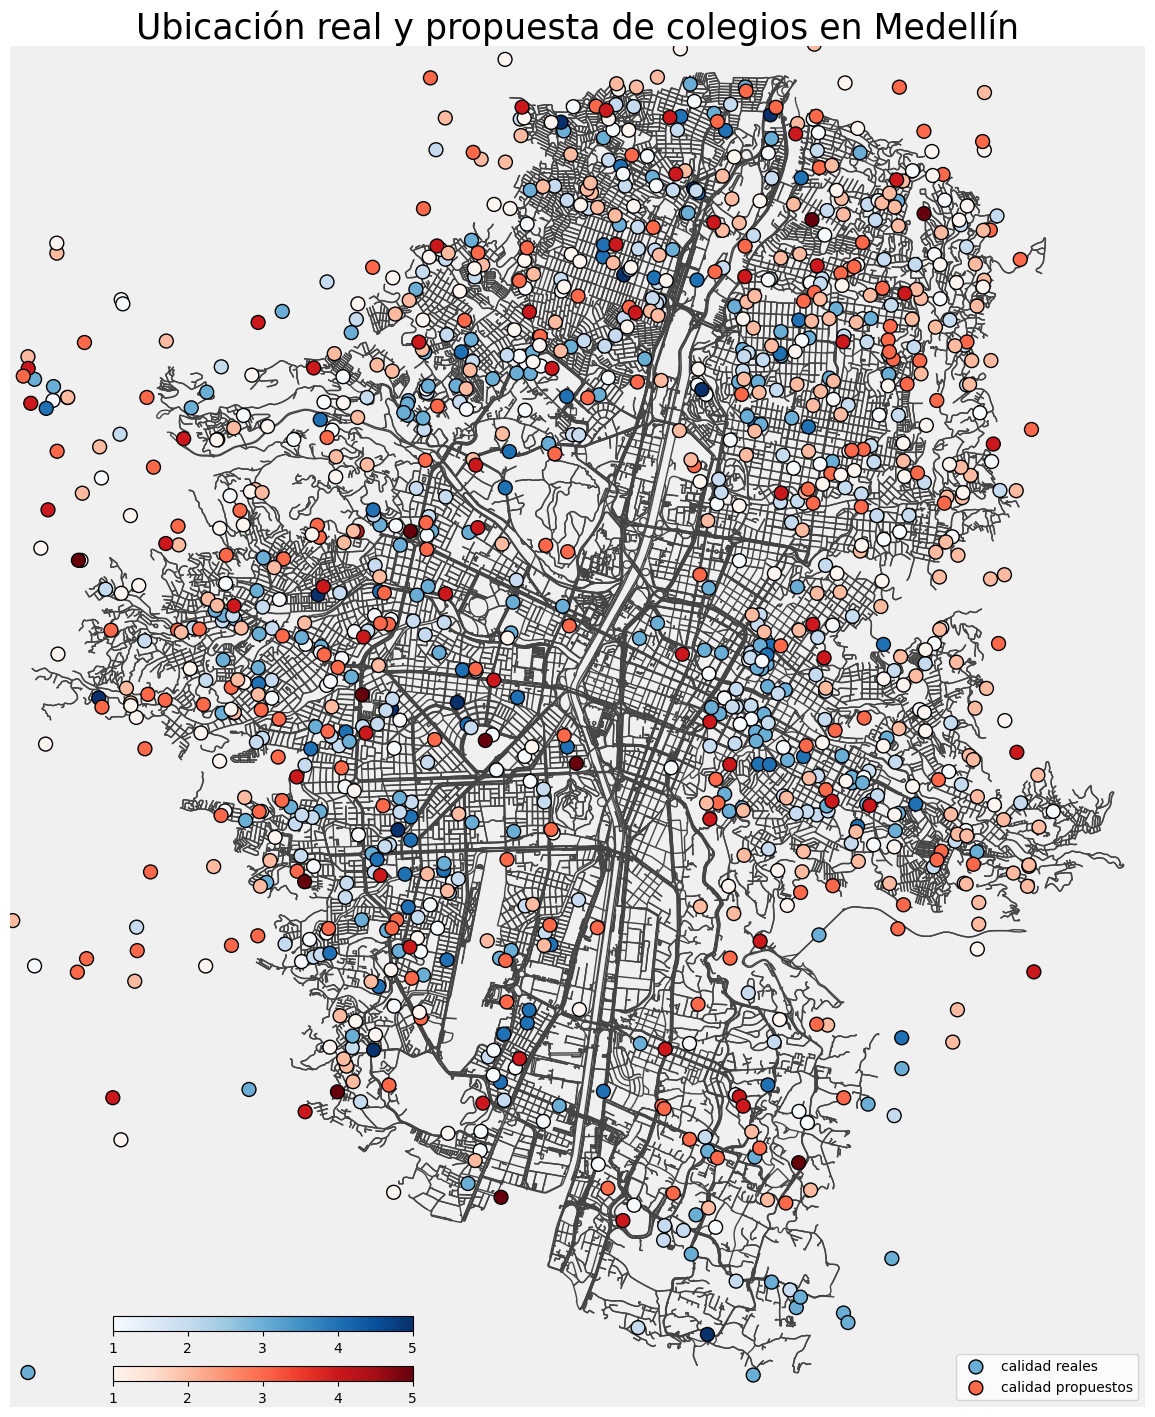

In [39]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import osmnx as ox

fig, ax = plt.subplots(figsize=(20, 20))
ox.plot_graph(grafo, ax=ax, show=False, close=False, edge_color='#444444', node_size=0)

# Define los mapas de colores, evitando colores que se confundan con el fondo
cmap_reales = plt.cm.Blues
cmap_propuestos = plt.cm.Reds

# Cambiar el color de fondo del mapa
ax.set_facecolor('#f0f0f0')  # Un gris claro que contraste con puntos blancos

# Graficar puntos con escalas de colores para datos numéricos
scatter_reales = gdf_reales.plot(ax=ax, markersize=100, alpha=1, label='calidad reales', column='COLE_CATEGORIA', cmap=cmap_reales, edgecolor='black')
scatter_propuestos = gdf_propuestos.plot(ax=ax, markersize=100, alpha=1, label='calidad propuestos', column='COLE_CATEGORIA', cmap=cmap_propuestos, edgecolor='black')

# Configurar las barras de color
norm_reales = plt.Normalize(vmin=gdf_reales['COLE_CATEGORIA'].min(), vmax=gdf_reales['COLE_CATEGORIA'].max())
norm_propuestos = plt.Normalize(vmin=gdf_propuestos['COLE_CATEGORIA'].min(), vmax=gdf_propuestos['COLE_CATEGORIA'].max())

sm_reales = ScalarMappable(cmap=cmap_reales, norm=norm_reales)
sm_reales.set_array([])
sm_propuestos = ScalarMappable(cmap=cmap_propuestos, norm=norm_propuestos)
sm_propuestos.set_array([])

# Crear colorbars más pequeñas y alinearlas horizontalmente en la esquina inferior izquierda
cbar_reales = fig.colorbar(sm_reales, ax=ax, orientation='horizontal', fraction=0.02, pad=0.04)
cbar_propuestos = fig.colorbar(sm_propuestos, ax=ax, orientation='horizontal', fraction=0.02, pad=0.04)

cbar_reales.ax.set_position([0.28, 0.225, 0.15, 0.02]) 
cbar_propuestos.ax.set_position([0.28, 0.2, 0.15, 0.02]) 

# Añadir etiquetas a las colorbars
#cbar_reales.set_label('Calidad Reales', fontsize=12)
#cbar_propuestos.set_label('Calidad Propuestos', fontsize=12)

# Configurar título
plt.title('Ubicación real y propuesta de colegios en Medellín', fontsize=25)
plt.legend(loc='lower right')

# Mostrar el mapa
plt.show()
